In [1]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters
import matplotlib.patches as patches
from PIL import Image

In [2]:
# path for all the npy files, each npy file contains one single frame
path = '/srv/home/chenyu/DEbackup/030120/BeamCurrent/npy/*.npy' 
filelist = glob.glob(path)
print('Total ' + str(len(filelist)) + ' files.')
counts = 0
# load test frame to determine frame size
image = np.load(filelist[0])
accumulated_frame = np.zeros(image.shape)
accumulated_frame_linear = np.zeros(image.shape)
# Threshold for electron counting, 10 should be good for DE-16 camera
threshold = 10
for i in range(len(filelist)):
    img = np.load(filelist[i])
    img_binary = np.heaviside(img-threshold,1)
    all_labels = measure.label(img_binary,connectivity=2)
    counts = counts + np.amax(all_labels)
    accumulated_frame = accumulated_frame + img_binary
    accumulated_frame_linear = accumulated_frame_linear + img
avg_counts = counts / len(filelist)
print('Average '+"{:.2f}".format(avg_counts) + ' electrons per frame.')


Total 5003 files.
Average 689.85 electrons per frame.


(-0.5, 199.5, 199.5, -0.5)

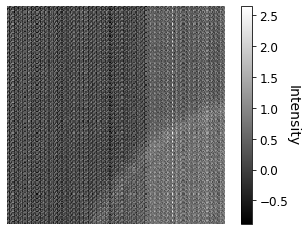

In [7]:
plt.imshow(accumulated_frame_linear[0:200,0:200]/5003,cmap='gray')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Intensity',rotation=270,fontsize=14, labelpad = 12)
plt.axis('off')
# plt.title('Linear Mode',fontsize=18)

Text(0.5, 1.0, 'Counting Mode')

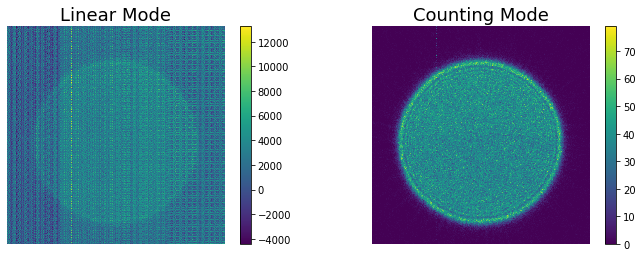

In [12]:
# Plot integrated image in linear mode and counting mode, image in counting mode should show no background variation
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(accumulated_frame_linear)
plt.colorbar()
plt.axis('off')
plt.title('Linear Mode',fontsize=18)

plt.subplot(122)
plt.imshow(accumulated_frame)
plt.colorbar()
plt.axis('off')
plt.title('Counting Mode',fontsize=18)

674


(-0.5, 511.5, 511.5, -0.5)

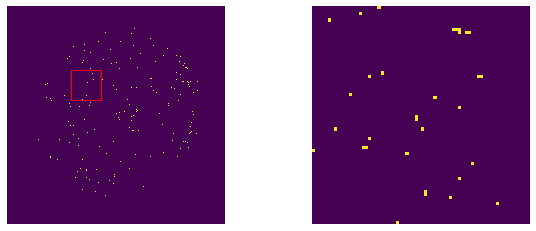

In [10]:
# Load and show single image
img = np.load('/srv/home/chenyu/DEbackup/022820/BeamCurrent/npy/S0_00001.npy')
img_binary = np.heaviside(img-10,1)
all_labels = measure.label(img_binary,connectivity=2)
# plt.imshow(all_labels[150:220,150:220])
# plt.colorbar()
print(np.amax(all_labels))

plt.figure(figsize=(10,4))

plt.subplot(122)
plt.imshow(img_binary[150:220,150:220])
plt.axis('off')

ax = plt.subplot(121)
ax.imshow(img_binary)
rect = patches.Rectangle((150,150),70,70,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.axis('off')